## Pima Indians Diabetes Prediction Analysis

#### Dataset Information

The Pima Indians Diabetes dataset contains information about female patients of Pima Indian heritage. It includes several medical measurements and whether or not each patient developed diabetes within five years.

Here are the details of the features in the dataset:

1. Pregnancies: Number of times pregnant.
2. Glucose: Plasma glucose concentration in an oral glucose tolerance test.
3. BloodPressure: Diastolic blood pressure (mm Hg).
4. SkinThickness: Triceps skinfold thickness (mm).
5. Insulin: 2-Hour serum insulin (mu U/ml).
6. BMI: Body mass index (weight in kg/(height in m)^2).
7. DiabetesPedigreeFunction: Diabetes pedigree function, which provides a measure of the genetic influence of diabetes based on family history.
8. Age: Age in years.
9. Outcome: The target variable indicating whether the patient developed diabetes (1) or not (0).

The goal of using this dataset is to build a machine learning model that can predict whether a patient will develop diabetes based on the given medical measurements.

### Work Flow
Data collection ---> Data Preprocessing ---> Data Analysis ---> Model Preparation ---> Model Evaluation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Data Collection

In [2]:
# load the data
diabetes = pd.read_csv('diabetes.csv')
print(diabetes.shape)
diabetes.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are 768 rows and 9 columns in this dataset

### Data Preprocessing

In [3]:
# get some information on the dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 2 main datatypes present in this dataset, float and integer datatypes.

In [4]:
# check for missing values
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values present in our dataset. 

### Data Analysis

In [5]:
# get some statistical information
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# check the outcomes
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

There are two outcomes, either you have diabetes or not. Here:  
    0 -> Does Not Have Diabetes           
    1 -> Has Diabetes
    
From this, we notice there are less people with diabetes in our diabetes.

In [7]:
# calculate teh correlation matrix
correlation_matrix = diabetes.corr()

# set the threshold for correlation
correlation_threshold = 0.5

In [8]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
Pregnancies - Age: 0.54
Age - Pregnancies: 0.54


Here we realize, there are two highly related features Pregnancies and Age. Does it mean the correlate with diabetes also or it represents a range of ages in which Pregnancies occur most? We can infer that, since its positively correlated, we can say that as woman ages the more likely she is to give birth at one point. 

In [9]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['Outcome']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Outcome: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Outcome: 
Outcome: 1.00


From here, we notice no feature highly correlates either positively or negatively with diabetes

###### performing data visualization

In [10]:
# set the background for the graphs
sns.set()

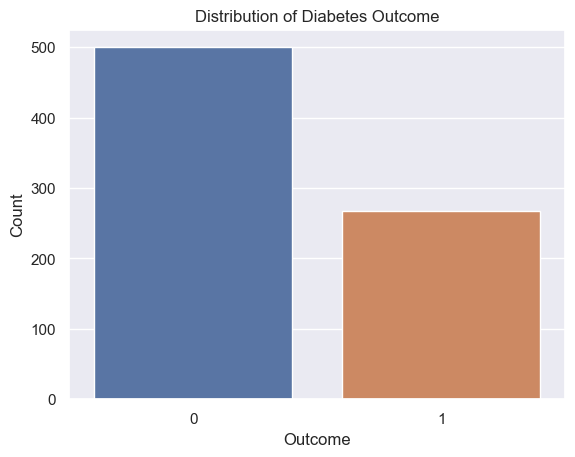

In [11]:
# distribution of the target variable
sns.countplot(diabetes['Outcome'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

Here's is the visualization of one of our inference. We notice the number of people with diabetes in our dataset are less than those without.

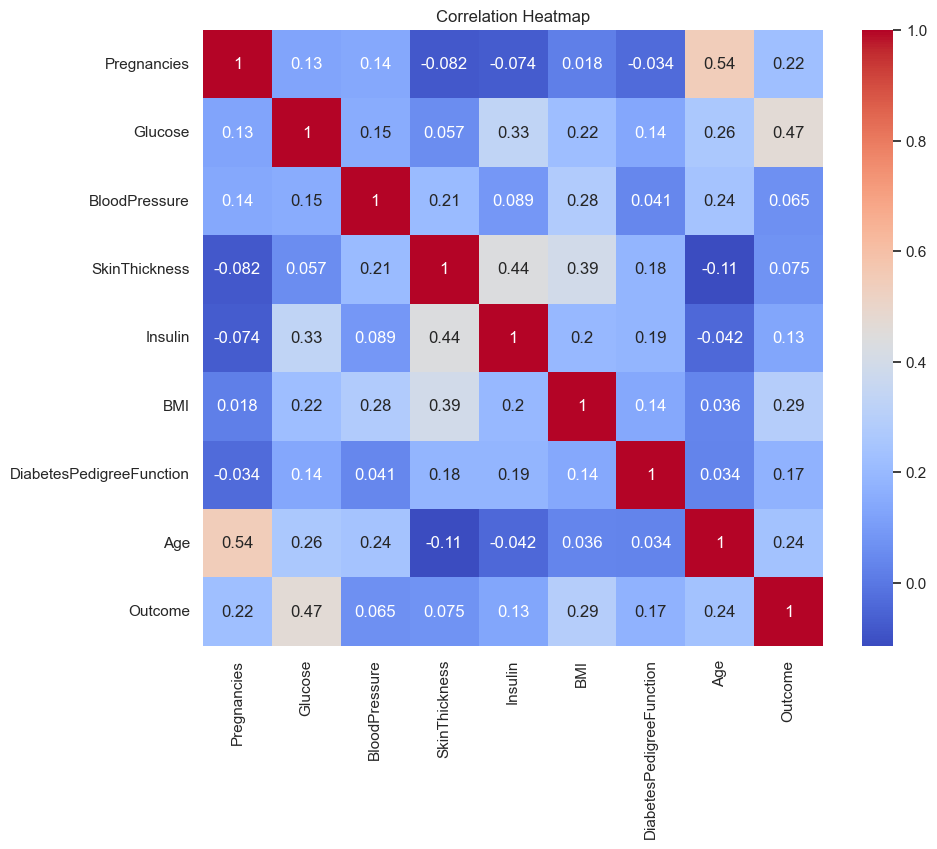

In [12]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This matrix provides a visualisation of features that correlate with each other.

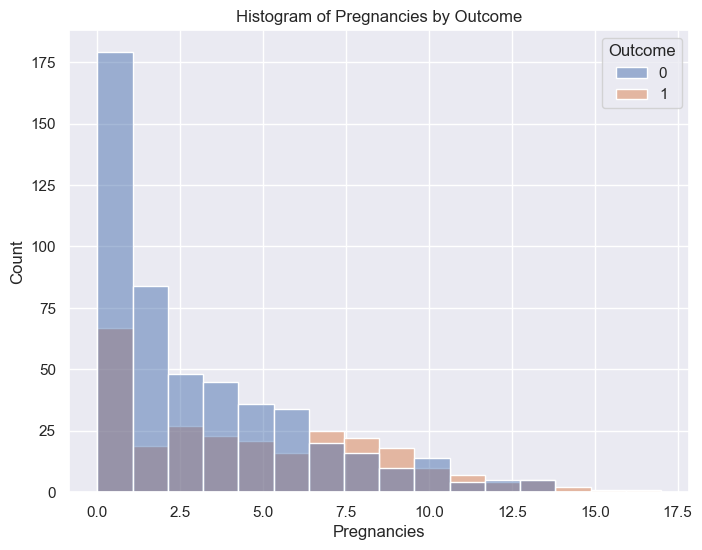

In [15]:
# distribution of pregnancies over outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes, x='Pregnancies', hue='Outcome')
plt.title("Histogram of Pregnancies by Outcome")
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.show()

Notice the number of times of pregnancies above 6 have a high probability of contracting diabetes while those below that range have a loww possibilities.

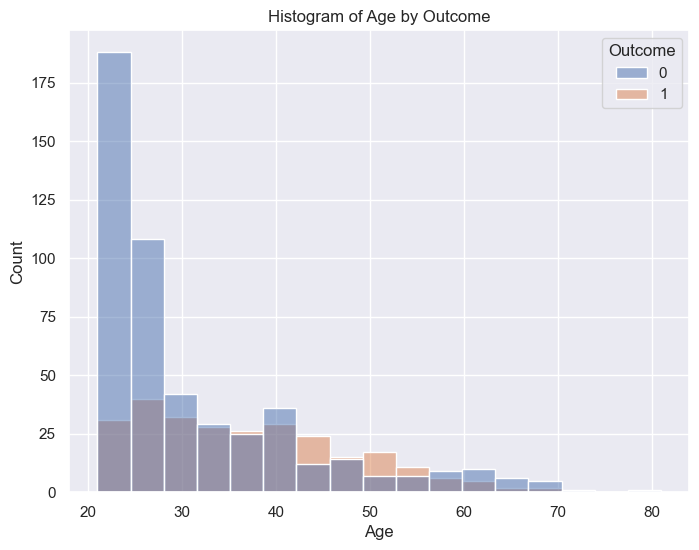

In [16]:
# distribution of age over outcome
plt.figure(figsize=(8, 6))
sns.histplot(data=diabetes, x='Age', hue='Outcome')
plt.title("Histogram of Age by Outcome")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We can infer that people beteween the ages of 20 and 40 are the least likely to contract diabetes. Not impossible but less likely. 

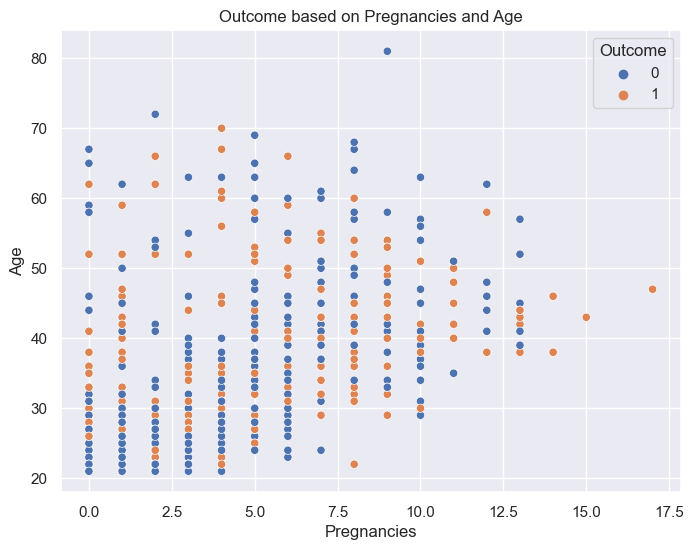

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pregnancies', y='Age', hue='Outcome', data=diabetes)
plt.title('Outcome based on Pregnancies and Age')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.show()

Notice how randomized the sacatter plot is; implies that pregnancies and age with respect to diabetes are random. One may or may not contract irrespective of their age when pregnant.

In [20]:
# finding the average value based on the diabetic outcome
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Model Preparation

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#### Train Test Split

In [22]:
# separate features and target variable
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

In [24]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Here the dataset is scaled to enable the model to perform very well

###### using logistic model

In [26]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#### Model Evaluation

In [27]:
# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[86 13]
 [20 35]]


Our model predicted 86 + 35 = 121 correctly and 20 + 13 = 33 wrongly.

In [28]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 78.57142857142857


Our logistic model performs fairly well with an accuracy of 78.57

###### using naive bayes model

In [29]:
# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#### Model Evaluation

In [30]:
# Display the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[84 15]
 [17 38]]


Our model predicted 84 + 38 = 122 correctly and 17 + 15 = 32 wrongly

In [31]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 79.22077922077922


this model predicted better with an accuracy of 79.22